In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.stats import poisson, norm
from scipy.signal import find_peaks
from matplotlib import colors

In [2]:
data= open('PoXexp1.txt', 'r') 
x = []
y = []
for line in data:
    p = line.split()
    angle = (p[0])
    psd = p[1]
    x.append(float(angle[:-1]))
    y.append(float(psd[:-1]))

In [3]:
plt.rcParams.update({
"image.origin": "lower",
"image.aspect": 1,
"text.usetex": True,
"grid.alpha": .5,
}) 
plt.style.use('ggplot')

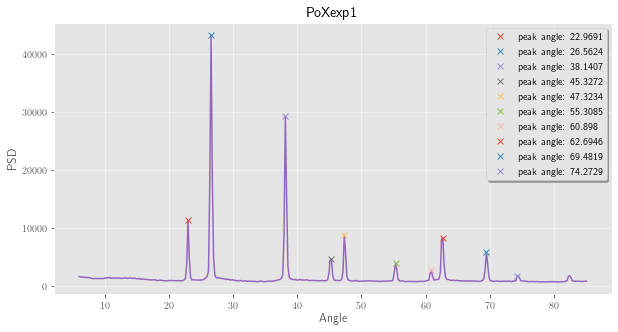

In [26]:
peaks, _ = find_peaks(y, height=1000,threshold=90)
plt.figure(figsize=(10,5))
plt.plot(x,y,c='tab:purple')
plt.ylabel('PSD')
plt.xlabel('Angle')
plt.title('PoXexp1')
for i in peaks: plt.plot(x[i],y[i],"x", label="peak angle: "+str(x[i]))
plt.legend(fancybox=True, shadow=True);

In [5]:
angles=[math.radians(x[i]/2) for i in peaks]
dAA=[1.54184/(np.sin(j)*2) for j in angles]
print(dAA)

[3.871952403008324, 3.355759569575985, 2.3595100091116405, 2.000727311668288, 1.9208861511970352, 1.6609825389259785, 1.5212387446508386, 1.4818991778125363, 1.352806943627027, 1.2769595910954972]


In [6]:
hkl=[[1,0,0],[1,1,0],[1,1,1],[2,0,0],[2,1,0],[2,1,1],[2,2,0],[3,0,0],[3,1,0],[3,1,1],[2,2,2],[3,2,0],[3,2,1],
     [4,0,0],[4,1,0],[4,1,1],[3,3,1],[4,2,0],[4,2,1],[3,3,2],[4,2,2],[5,0,0],[5,1,0],[5,1,1],[4,3,2]]

In [7]:
m=0
hkl2=[]
for i in hkl:
    j=0
    for j in i: 
        m+=j**2
    hkl2.append(m)
    m=0
print(hkl2)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29]


In [8]:
def cubic(d,par):
    return d*np.sqrt(par[0]**2+par[1]**2+par[2]**2)

In [22]:
def m (a, daa):
    return (a/daa)**2
a=[]
for daa in dAA[:-1]: 
    #print()
    #print(daa, m(cubic(dAA[0],hkl[2]),daa),round(m(cubic(dAA[0],hkl[2]),daa)), int(m(cubic(dAA[0],hkl[2]),daa)))

    if daa>3.35:a.append(cubic(daa,hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))]))
    else:a.append(cubic(daa,hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))]))
   # print(daa, hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))])

In [24]:
#print(a)
print(np.mean(a),np.std(a))

6.67195462017337 0.04388883113231628


6.706418286498822


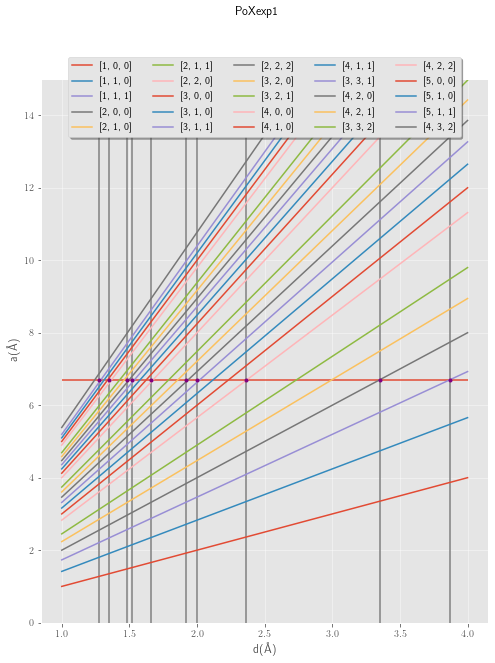

In [25]:
dlista=np.linspace(1,4,1000)
plt.figure(figsize=(8,10))
for i in range(len(hkl)):
    #rgb = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(dlista,cubic(dlista,hkl[i]),label=str(hkl[i]))
    #plt.hlines(cubic(dAA[-1],hkl[i]),1,4)
plt.ylabel("a(\AA)")
plt.xlabel("d(\AA)")
for i in (dAA):
    plt.vlines(i,0,20, colors="tab:gray")
    plt.plot(i,cubic(dAA[0],hkl[2]),'.',c='purple')

plt.hlines(cubic(dAA[0],hkl[2]),1,4)
plt.suptitle("PoXexp1")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=5, fancybox=True, shadow=True)
plt.ylim(0,15)
print(cubic(dAA[0],hkl[2]))
#for i in dAA: print(cubic(i,hkl[2]))

3.871952403008324
3.355759569575985


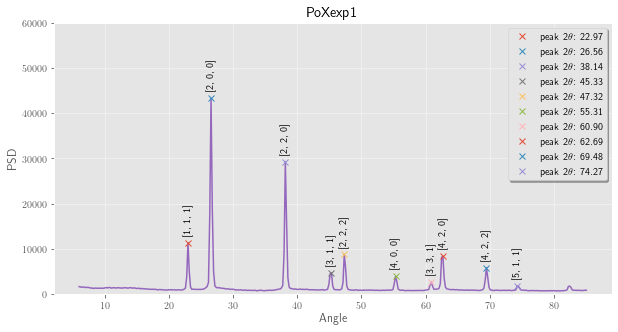

In [16]:
plt.figure(figsize=(10,5))
plt.plot(x,y,c='tab:purple')
plt.ylabel('PSD')
plt.xlabel('Angle')
plt.title('PoXexp1')
plt.ylim(0,60000);
for i in peaks:
    plt.plot(x[i],y[i],"x", label="peak 2$\\theta$: {:.2f}".format(x[i]))
    plt.legend( fancybox=True, shadow=True)
    if i<110:    
         print(1.54184/(np.sin(math.radians(x[i]/2))*2))
         plt.text(x[i],y[i]+2000,str(hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),1.54184/(np.sin(math.radians(x[i]/2))*2))))]),ha='center',rotation=90)
    else: plt.text(x[i],y[i]+2000,str(hkl[hkl2.index(int(m(cubic(dAA[0],hkl[2]),1.54184/(np.sin(math.radians(x[i]/2))*2))))]),ha='center',rotation=90)

In [29]:
!jupyter nbconvert --to html  POX1raiox_hkl.ipynb

[NbConvertApp] Converting notebook POX1raiox_hkl.ipynb to html
[NbConvertApp] Writing 554467 bytes to POX1raiox_hkl.html
